In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set_style('ticks')

In [3]:
data = pd.read_csv("./data/train_home_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(data.columns)

81

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
null_ranked = pd.DataFrame(data.isnull().sum(), columns  = ['sum of null value']).sort_values(by = "sum of null value", ascending=False).iloc[:38]
# terlihat bahwa PoolQC merupakan atribut dengan jumlah nilai nukll terbanyak dan hanya 6 baris dari  kolom PoolQC yang terisi
null_ranked

,sum of null value
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [7]:
null_ranked['sum of null value'].index.to_list()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'Id',
 'Functional',
 'Fireplaces',
 'KitchenQual',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'FullBath',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GrLivArea',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch']

In [8]:
object_type = [(column, value) for column, value in zip(null_ranked.index, null_ranked['sum of null value']) if data[column].dtype == "object"]
object_type

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('GarageCond', 81),
 ('GarageType', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('BsmtFinType2', 38),
 ('BsmtExposure', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('Electrical', 1),
 ('Functional', 0),
 ('KitchenQual', 0),
 ('PavedDrive', 0)]

In [20]:
# data.corr()

In [10]:
get_correlation = pd.DataFrame(data.corr()['SalePrice'].sort_values(ascending = False))
get_correlation

C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_19656\2530848299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  get_correlation = pd.DataFrame(data.corr()['SalePrice'].sort_values(ascending = False))


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_19656\2197120319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(data.corr()), annot=True)


<Axes: >

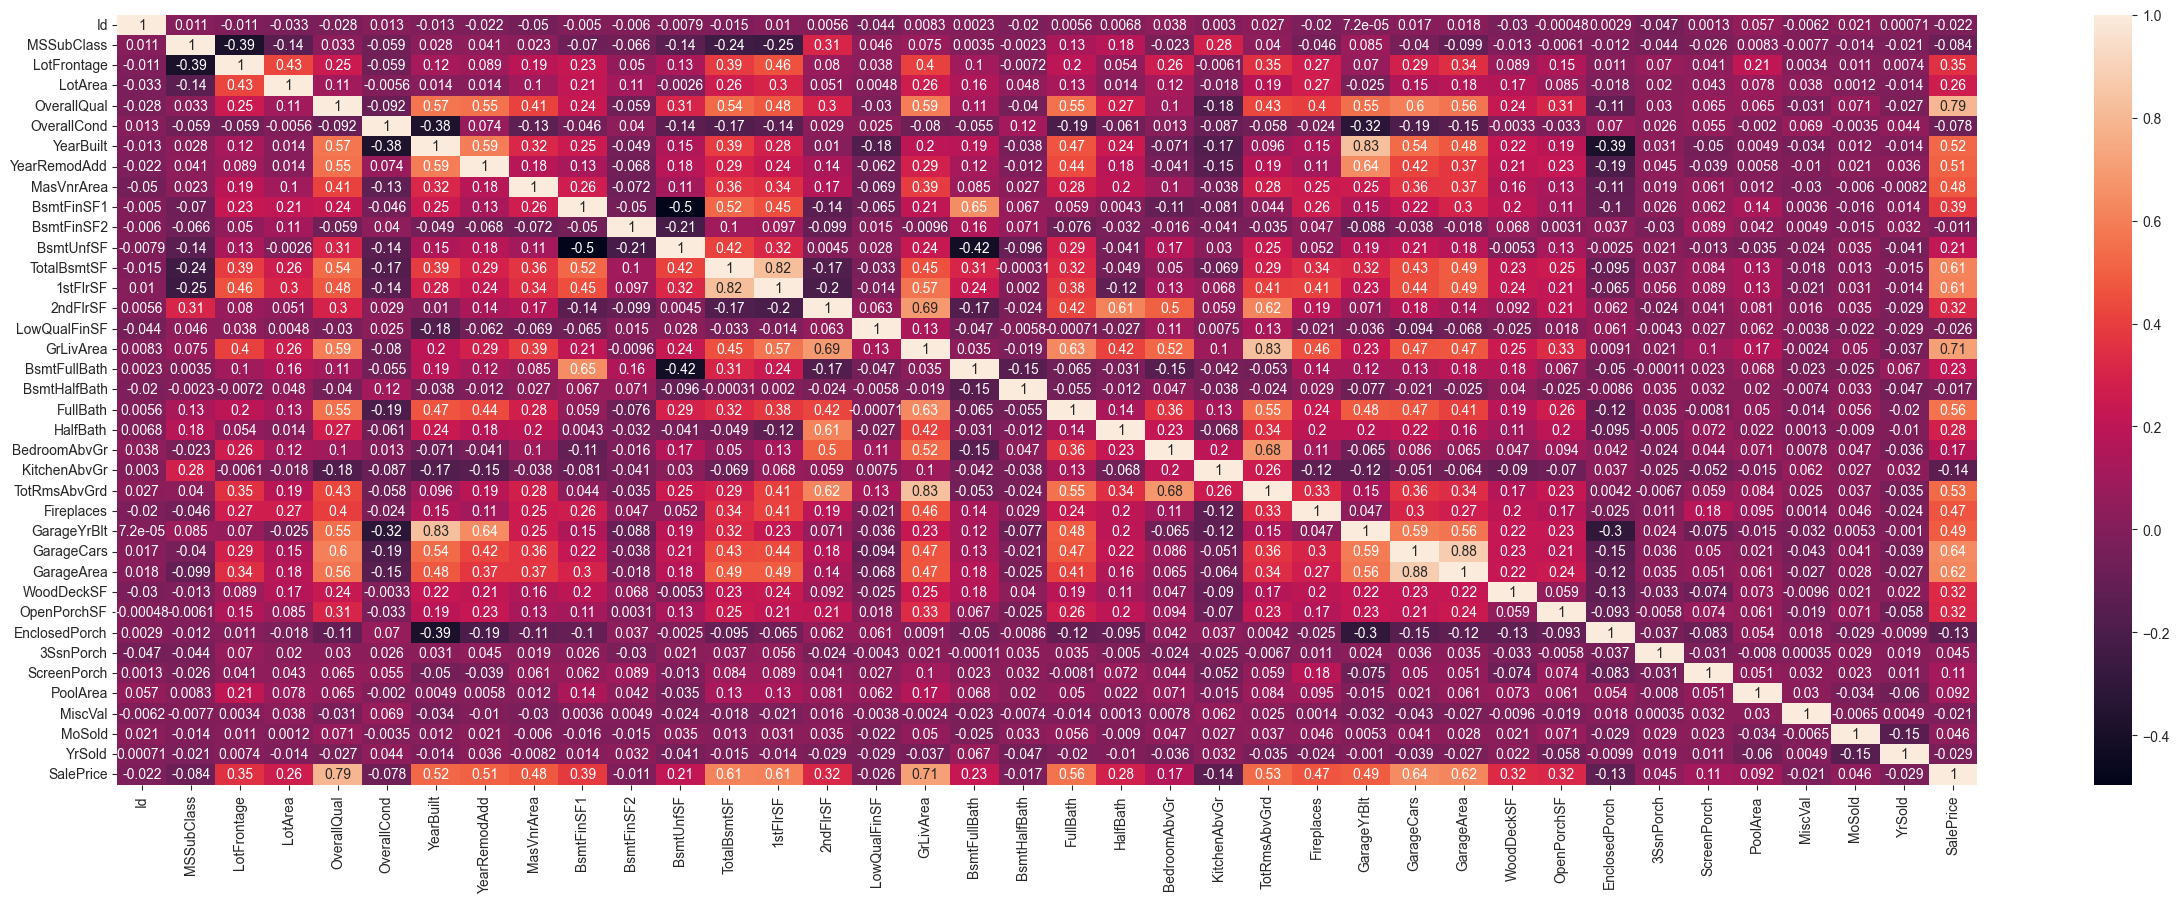

In [13]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.heatmap(pd.DataFrame(data.corr()), annot=True)

In [14]:

def drop_column(data: pd.DataFrame, correlation_score: pd.DataFrame, null_ranked: pd.DataFrame) -> pd.DataFrame:
    # Hapus kolom berdasarkan jumlah nilai yang null
    for column in null_ranked.index:
        if null_ranked.loc[column, 'sum of null value'] > 100:
            data.drop(column, axis=1, inplace=True)

    # Hapus kolom berdasarkan nilai korelasi jika korlasi lebih keicil  dari 20% 
    for column in correlation_score.index:
        if correlation_score.loc[column, 'SalePrice'] < 0.20:
            data.drop(column, axis=1, inplace=True)
    #  returnr dataframe
    return data
    


# terlihat  bahwa data yang baru saat ini memiliki 60 kolom yang sebelumnya berjumalah 81
new_data = drop_column(data =data, correlation_score=get_correlation, null_ranked=null_ranked)
new_data.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,3,836,TA,TA,Y,192,84,WD,Normal,250000


In [21]:
new_data.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [75]:
new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts')
new_data

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,garage_range
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,0,61,WD,Normal,208500,>500m^2
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,298,0,WD,Normal,181500,300m^2 <= range < 500m^2
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,0,42,WD,Normal,223500,>500m^2
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,0,35,WD,Abnorml,140000,>500m^2
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,192,84,WD,Normal,250000,>500m^2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,460,TA,TA,Y,0,40,WD,Normal,175000,300m^2 <= range < 500m^2
1456,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,500,TA,TA,Y,349,0,WD,Normal,210000,>500m^2
1457,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,252,TA,TA,Y,0,60,WD,Normal,266500,<300m^2
1458,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,240,TA,TA,Y,366,0,WD,Normal,142125,<300m^2


' \nnote \nAbnormal: Merujuk pada kondisi atau situasi yang tidak biasa atau tidak lazim terkait dengan properti.\nAdjland n merupakan kependekan dari "Adjacent Land" atau "Tanah yang Berdekatan". Ini bisa merujuk pada properti tambahan atau tanah yang berbatasan langsung dengan properti yang dijual.\nAlloc: Ini mungkin merupakan kependekan dari "Allocation" yang merujuk pada alokasi atau penugasan tertentu dalam konteks penjualan rumah. Misalnya, alokasi biaya tertentu antara pembeli dan penjual.\nFamily  merujuk pada properti yang ideal atau cocok untuk keluarga. Ini bisa mencakup ukuran properti, jumlah kamar tidur, dan fasilitas lain yang cocok untuk kebutuhan keluarga.\nNormal Merujuk pada kondisi atau status properti yang dianggap standar atau biasa. Properti dalam kondisi normal mungkin tidak memiliki masalah besar atau cacat yang signifikan.\nPartial merujuk pada kondisi properti di mana sebagian dari properti tersebut mengalami masalah atau kerusakan, tetapi tidak semuanya. In

<Figure size 640x480 with 0 Axes>

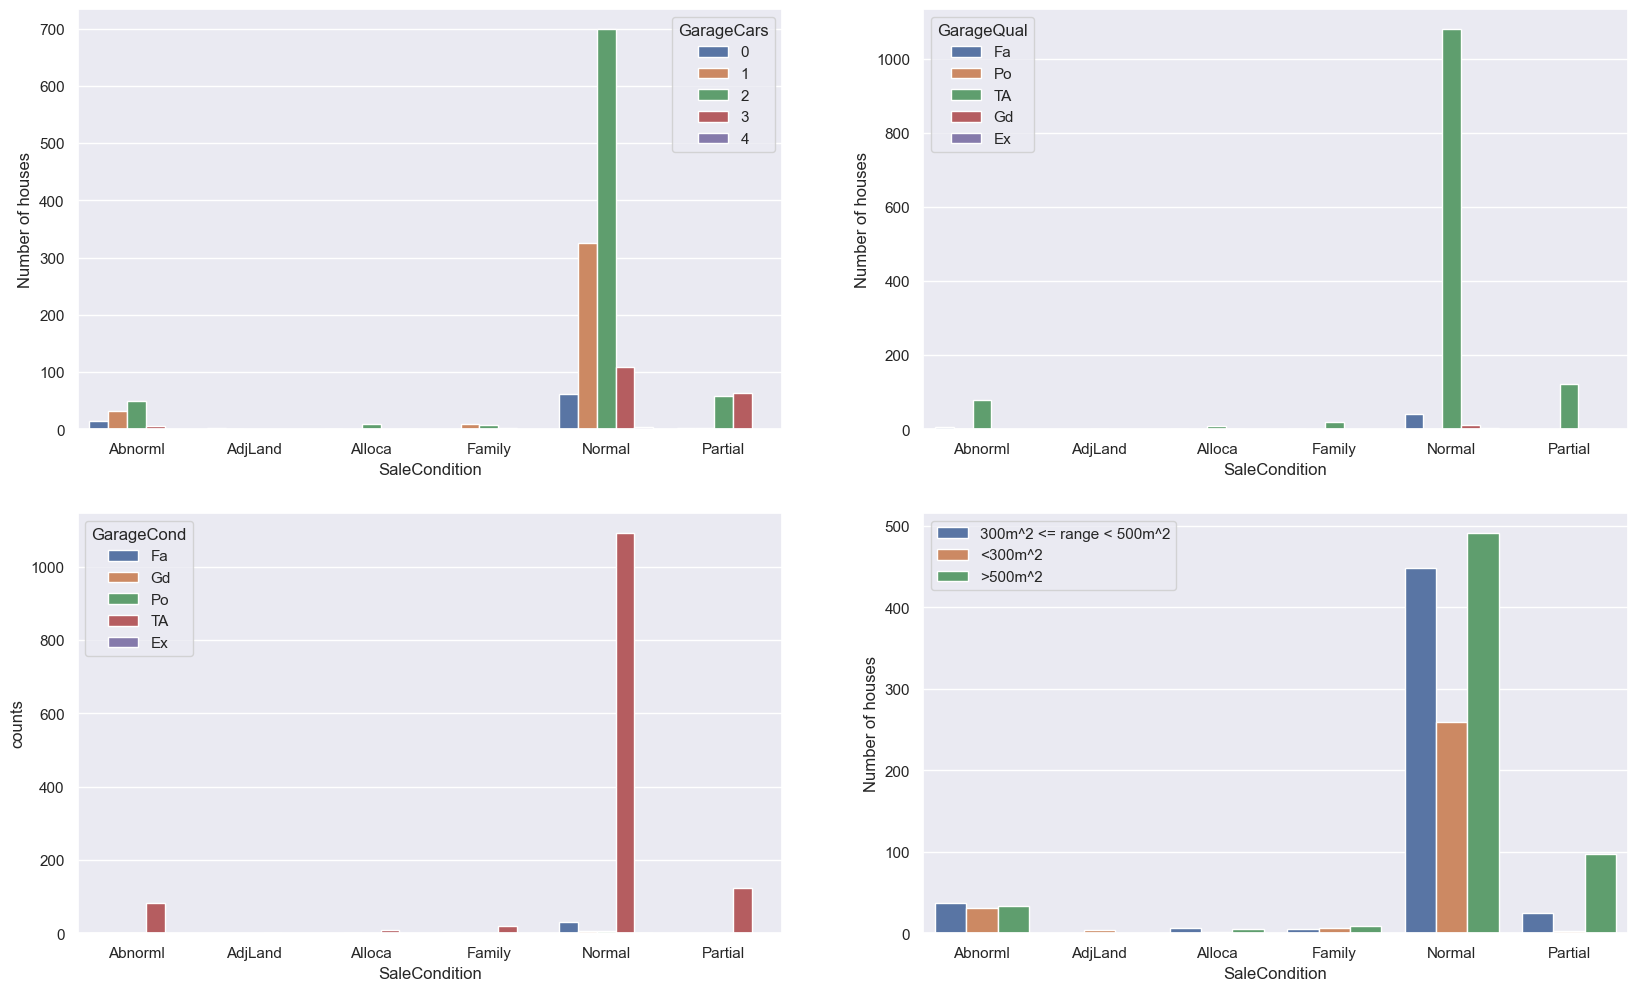

In [83]:
sns.set_theme()
sns.axes_style("darkgrid")
sns.despine()
def new_garage_area(data : pd.DataFrame) -> pd.DataFrame: 
    data["garage_range"] = "0" * data.shape[0]
    for row in range(data.shape[0]):
        if data.loc[row, "GarageArea"] < 300:
            data.at[row, "garage_range"] = "<300m^2"
        elif data.loc[row, "GarageArea"] >= 300 and  data.loc[row, "GarageArea"] < 500:
            data.at[row, "garage_range"] = "300m^2 <= range < 500m^2"
        else:
            data.at[row, "garage_range"] = ">500m^2" 
    return data


new_data = new_garage_area(new_data)

# korelasi antara GarageCars', 'GarageArea', 'GarageQual', 'GarageCond terhadap kondisi rumah yang dijuaal
fig, ax = plt.subplots(figsize = (20, 12), ncols=2, nrows=2)


# Membuat barplot menggunakan data yang sudah diagregasi
sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCars', ax=ax[0, 0])
ax[0, 0].set_ylabel("Number of houses")


sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageQual']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageQual', ax=ax[0, 1])
ax[0, 1].set_ylabel("Number of houses")



sns.barplot(data=new_data.groupby(['SaleCondition', 'garage_range']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='garage_range', ax=ax[1, 1])
ax[1, 0].set_ylabel("Number of houses")



sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCond']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCond', ax=ax[1, 0])
ax[1, 1].set_ylabel("Number of houses")
ax[1,1].legend(loc='upper left')

''' 
note 
Abnormal: Merujuk pada kondisi atau situasi yang tidak biasa atau tidak lazim terkait dengan properti.
Adjland n merupakan kependekan dari "Adjacent Land" atau "Tanah yang Berdekatan". Ini bisa merujuk pada properti tambahan atau tanah yang berbatasan langsung dengan properti yang dijual.
Alloc: Ini mungkin merupakan kependekan dari "Allocation" yang merujuk pada alokasi atau penugasan tertentu dalam konteks penjualan rumah. Misalnya, alokasi biaya tertentu antara pembeli dan penjual.
Family  merujuk pada properti yang ideal atau cocok untuk keluarga. Ini bisa mencakup ukuran properti, jumlah kamar tidur, dan fasilitas lain yang cocok untuk kebutuhan keluarga.
Normal Merujuk pada kondisi atau status properti yang dianggap standar atau biasa. Properti dalam kondisi normal mungkin tidak memiliki masalah besar atau cacat yang signifikan.
Partial merujuk pada kondisi properti di mana sebagian dari properti tersebut mengalami masalah atau kerusakan, tetapi tidak semuanya. Ini bisa berarti hanya bagian tertentu dari properti yang memerlukan perbaikan atau renovasi.
'''


In [19]:

# def convert_to_label_encoder(data: pd.DataFrame) -> pd.DataFrame:
#     for column in data.columns:
#         #  check jika data type == object dan check apakah termasuk tipe data kategorikal
#         if data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(data[column]):
#             le = LabelEncoder()
#             data[column] = le.fit_transform(data[column])
#     return data 

# # Misalkan new_data adalah DataFrame Anda
# new_data_encode  = convert_to_label_encoder(new_data)

# new_data_encode.head()
# new_data = convert_to_label_encodder(new_data)
